In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input

In [3]:
img_width = 227
img_height = 227
channels = 3
input_shape = (img_width, img_height, channels)

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_dir = '/kaggle/input/tomato-diseases/test'
test_dir = '/kaggle/input/tomato-diseases/train'

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical')

Found 4440 images belonging to 10 classes.
Found 17753 images belonging to 10 classes.


In [7]:
model = Sequential()
model.add(Input(shape=input_shape)) 

# Layer 1
model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', 
                padding='same'))
model.add(MaxPooling2D((3, 3), strides=(2, 2)))
model.add(BatchNormalization())

# Layer 2
model.add(Conv2D(256, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D((3, 3), strides=(2, 2)))
model.add(BatchNormalization())

# Layer 3
model.add(Conv2D(384, (3, 3), activation='relu', padding='same'))

# Layer 4
model.add(Conv2D(384, (3, 3), activation='relu', padding='same'))

# Layer 5
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((3, 3), strides=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [8]:
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 57, 57, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 28, 28, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 13, 13, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 6, 6, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          40,970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,324,746 (222.49 MB)

 Trainable params: 58,323,530 (222.49 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [16]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=50,
    validation_data=test_generator,
    validation_steps=test_generator.n // test_generator.batch_size,
)

Epoch 1/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 83s 587ms/step - accuracy: 0.7816 - loss: 0.6232 - val_accuracy: 0.7293 - val_loss: 0.8088
Epoch 2/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 187us/step - accuracy: 0.9062 - loss: 0.3956 - val_accuracy: 0.7200 - val_loss: 1.1070
Epoch 3/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 83s 583ms/step - accuracy: 0.7990 - loss: 0.5948 - val_accuracy: 0.6949 - val_loss: 1.0646
Epoch 4/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 191us/step - accuracy: 0.8438 - loss: 0.5970 - val_accuracy: 0.6800 - val_loss: 1.1724
Epoch 5/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 82s 574ms/step - accuracy: 0.8152 - loss: 0.5372 - val_accuracy: 0.7817 - val_loss: 0.6774
Epoch 6/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step - accuracy: 0.8438 - loss: 0.4730 - val_accuracy: 0.8400 - val_loss: 0.5299
Epoch 7/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 82s 580ms/step - accuracy: 0.8374 - loss: 0.4742 - val_accuracy: 0.6978 - val_loss: 1.1207
Epoch 8/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 191us/step - accuracy: 0.9167 - loss: 0.558

In [19]:
model.save('alexnet_leaf_disease.h5')

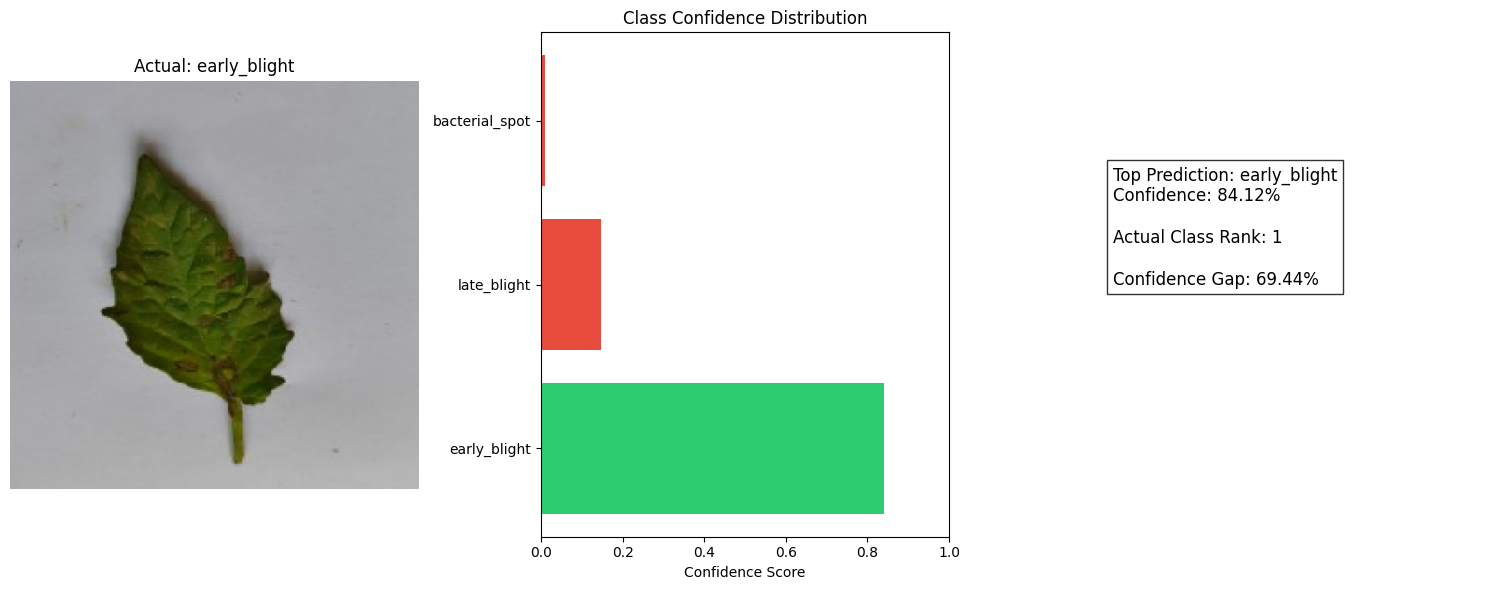

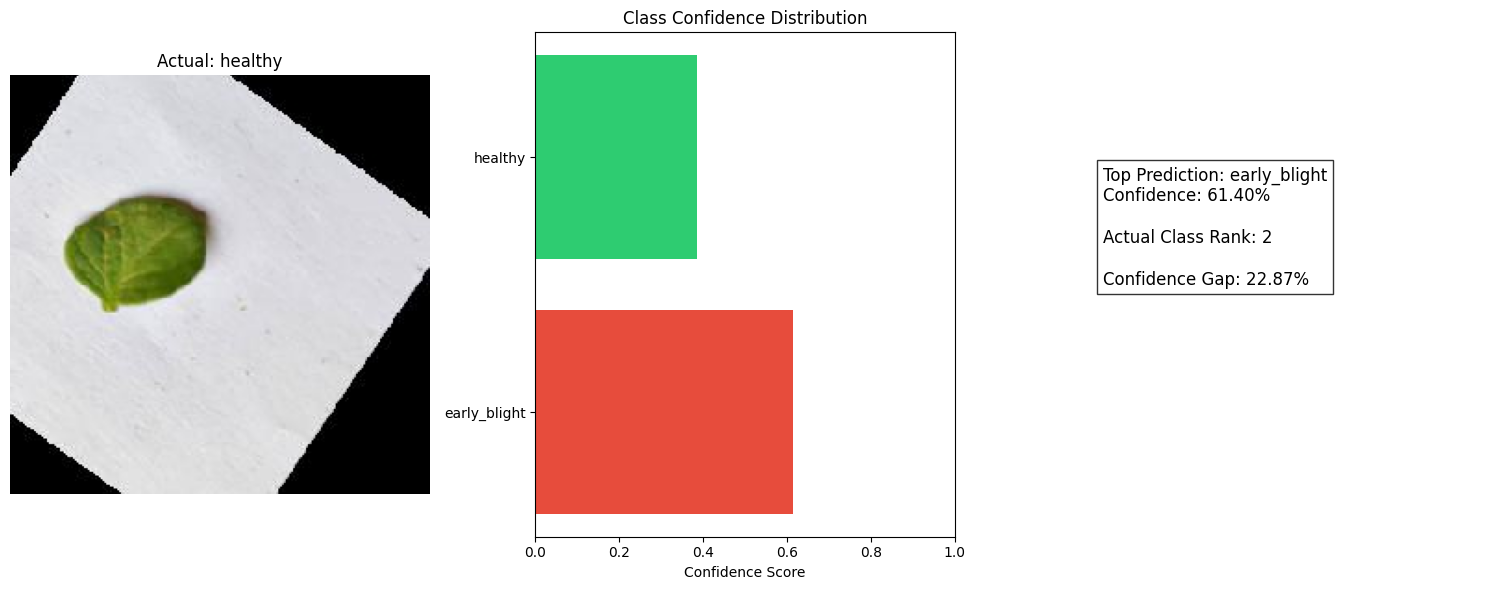

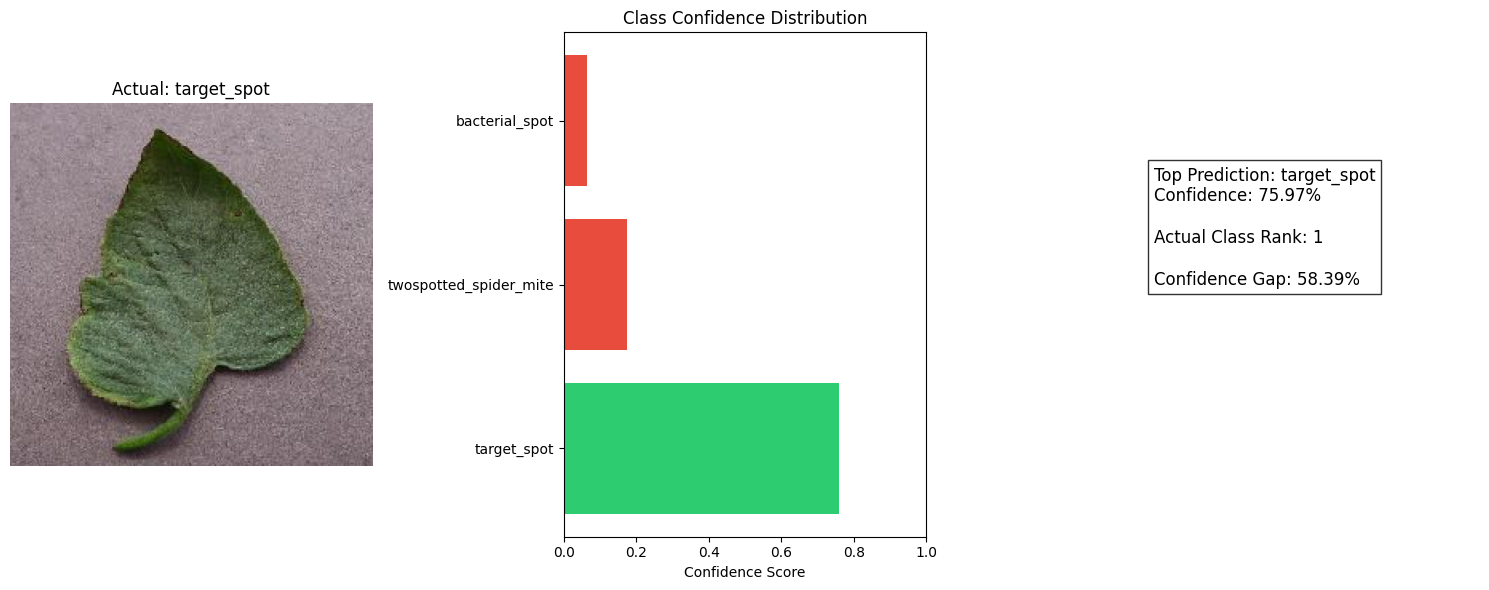

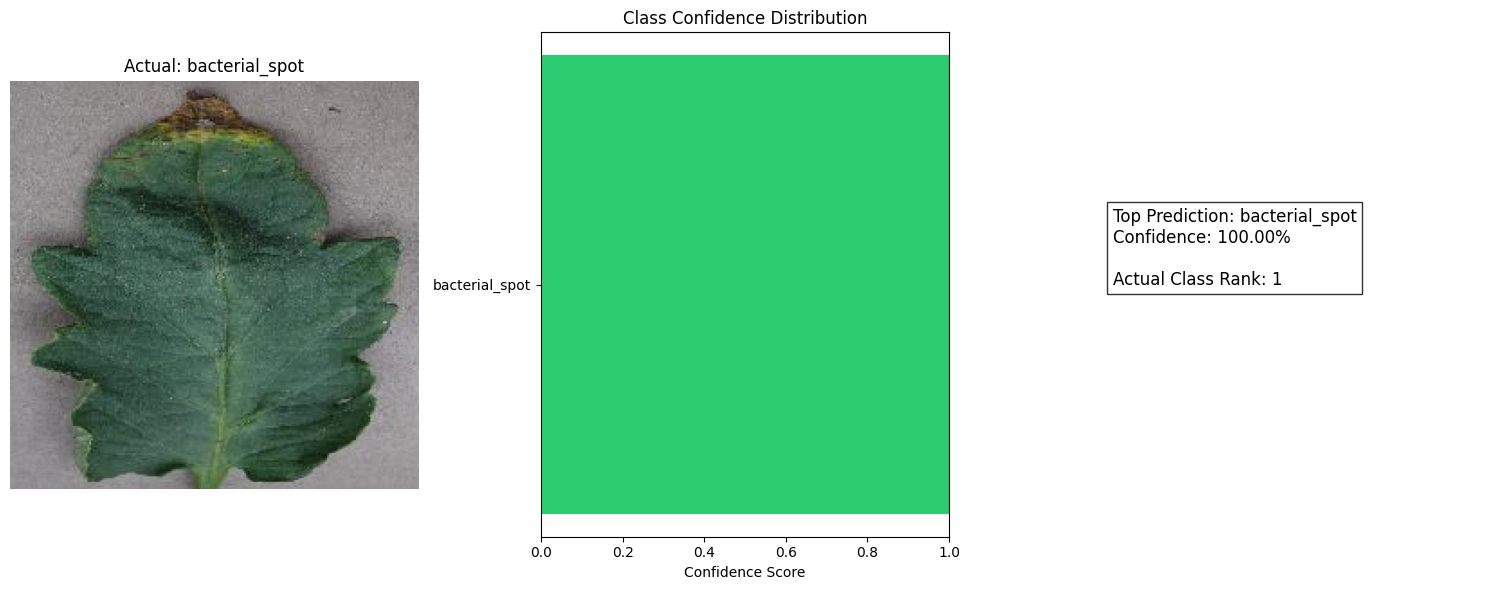

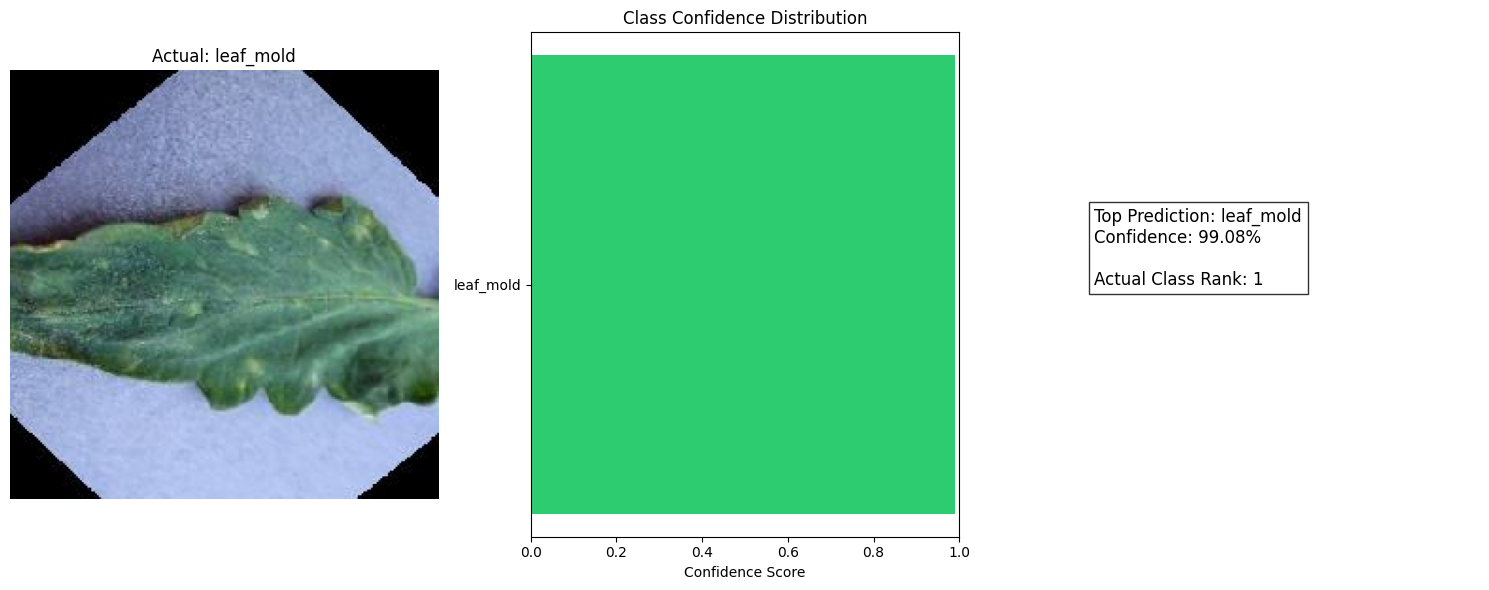

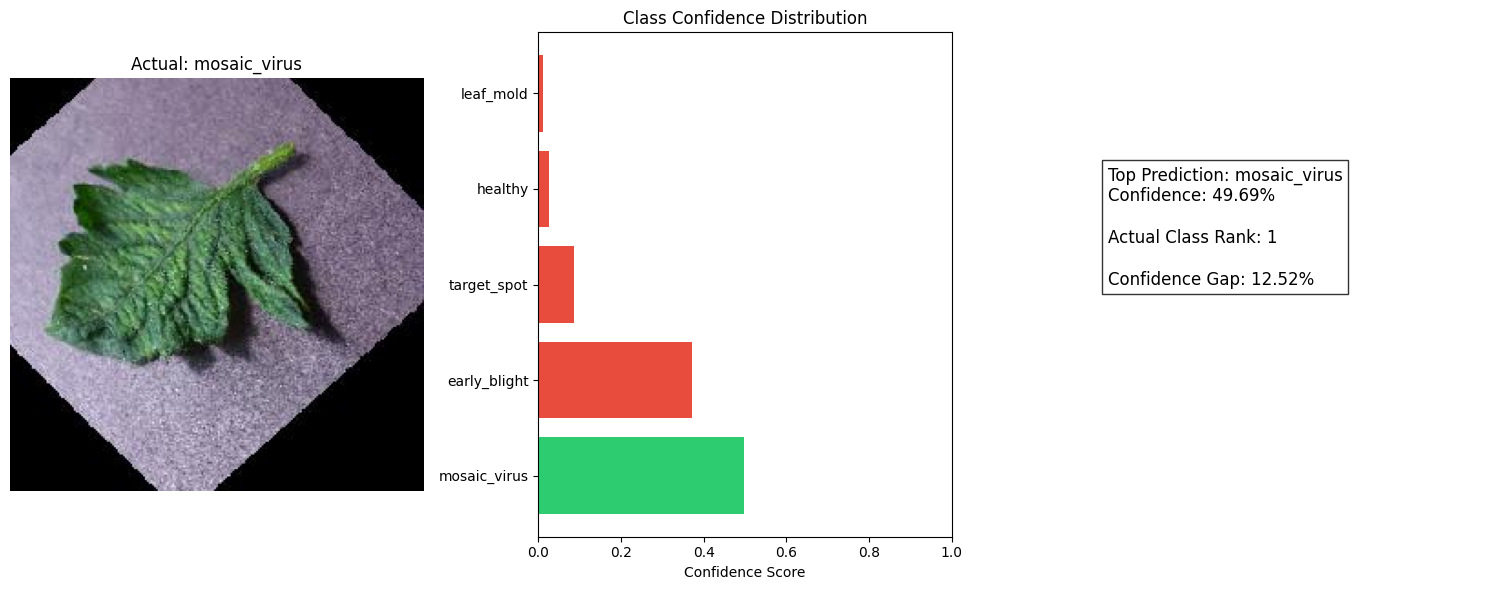

In [25]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

def enhanced_predict(image_path, model, class_names):
    img = image.load_img(image_path, target_size=(227, 227))
    img_array = image.img_to_array(img)
    
    img_array = img_array / 255.0  # Must match ImageDataGenerator's rescale
    img_array = np.expand_dims(img_array, axis=0)
    
    augmented_images = [
        img_array,
        np.flip(img_array, axis=2),  # Horizontal flip
        img_array * 0.9 + 0.1,       # Contrast reduction
        img_array * 1.1,             # Brightness boost
        img_array + np.random.normal(0, 0.01, img_array.shape)  # Noise
    ]
    
    predictions = []
    for aug_img in augmented_images:
        pred = model.predict(aug_img, verbose=0)[0]
        predictions.append(pred)
    
    mean_pred = np.mean(predictions, axis=0)
    final_pred = mean_pred / np.sum(mean_pred)
    
    sorted_indices = np.argsort(final_pred)[::-1]
    valid_predictions = [(class_names[i], final_pred[i]) 
                        for i in sorted_indices if final_pred[i] > 0.01]
    
    return img, final_pred, valid_predictions

def show_diagnosis(image_path, model, class_names):
    img, probs, valid_preds = enhanced_predict(image_path, model, class_names)
    actual_class = os.path.basename(os.path.dirname(image_path))
    
    plt.figure(figsize=(15, 6))
    
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title(f"Actual: {actual_class}", fontsize=12)
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    labels = [p[0] for p in valid_preds]
    values = [p[1] for p in valid_preds]
    colors = ['#2ecc71' if label == actual_class else '#e74c3c' for label in labels]
    
    plt.barh(labels, values, color=colors)
    plt.xlabel('Confidence Score')
    plt.title('Class Confidence Distribution')
    plt.xlim(0, 1)
    
    plt.subplot(1, 3, 3)
    plt.axis('off')
    analysis_text = []
    
    top_pred = valid_preds[0]
    analysis_text.append(f"Top Prediction: {top_pred[0]}\nConfidence: {top_pred[1]:.2%}")
    
    actual_rank = next((i+1 for i, p in enumerate(valid_preds) 
                       if p[0] == actual_class), 'Not in Top 5')
    analysis_text.append(f"\nActual Class Rank: {actual_rank}")
    
    if len(valid_preds) > 1:
        confidence_gap = top_pred[1] - valid_preds[1][1]
        analysis_text.append(f"\nConfidence Gap: {confidence_gap:.2%}")
    
    plt.text(0.1, 0.5, '\n'.join(analysis_text), fontsize=12,
            bbox=dict(facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

class_names = list(train_generator.class_indices.keys())

for _ in range(6):
    class_folder = random.choice(os.listdir(test_dir))
    class_path = os.path.join(test_dir, class_folder)
    img_file = random.choice(os.listdir(class_path))
    img_path = os.path.join(class_path, img_file)
    show_diagnosis(img_path, model, class_names)